# About Dataset
link  https://www.kaggle.com/datasets/zubairdhuddi/tesla-dataset

This dataset records Tesla’s global vehicle performance between 2015 and 2025, providing insights into deliveries, production output, average prices, and environmental benefits. It supports analysis of regional trends, production efficiency, and sustainability performance across different Tesla models.
## Introduction

This notebook focuses on analyzing Tesla’s global vehicle performance dataset (2015–2025) and building a predictive machine learning model to estimate Estimated_Deliveries.
The dataset provides yearly insights into Tesla’s production capacity, market expansion, pricing, and sustainability metrics across multiple regions and vehicle models.

By combining these features, we aim to understand the key drivers behind Tesla’s delivery numbers and develop a regression model that can forecast future delivery estimates with high reliability.

Main objectives of this notebook:

📊 Explore Tesla’s production, pricing, and environmental indicators

🔍 Identify correlations and delivery-impacting features

🧹 Preprocess the dataset for ML modeling

🤖 Train multiple regression models to predict Estimated_Deliveries

📈 Compare model performance using MAE, RMSE, R²

🎯 Select the best-performing model for future forecasting

This end-to-end workflow helps uncover patterns in Tesla’s growth trajectory and builds a foundation for predictive analytics in the electric vehicle industry.

## Imports

In [1]:
import kagglehub
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor


## Load The Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("zubairdhuddi/tesla-dataset")

print("Path to dataset files:", path)

100%|██████████| 64.8k/64.8k [00:00<00:00, 45.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zubairdhuddi/tesla-dataset/versions/1


In [3]:
print(os.listdir(path))

['tesla_deliveries_dataset_2015_2025.csv']


In [4]:
df = pd.read_csv(os.path.join(path,'tesla_deliveries_dataset_2015_2025.csv'))

## Explore The Data

In [5]:
df.head()

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [6]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

## Prerocessing

In [9]:
cols = ['Source_Type','Model','Region']

dummy = pd.get_dummies(df[cols]).astype(int)
df = df.drop(columns=cols, axis=1)
df = pd.concat([df, dummy], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              2640 non-null   int64  
 1   Month                             2640 non-null   int64  
 2   Estimated_Deliveries              2640 non-null   int64  
 3   Production_Units                  2640 non-null   int64  
 4   Avg_Price_USD                     2640 non-null   float64
 5   Battery_Capacity_kWh              2640 non-null   int64  
 6   Range_km                          2640 non-null   int64  
 7   CO2_Saved_tons                    2640 non-null   float64
 8   Charging_Stations                 2640 non-null   int64  
 9   Source_Type_Estimated (Region)    2640 non-null   int64  
 10  Source_Type_Interpolated (Month)  2640 non-null   int64  
 11  Source_Type_Official (Quarter)    2640 non-null   int64  
 12  Model_

## Visualize The Data

### Correlation Matrix

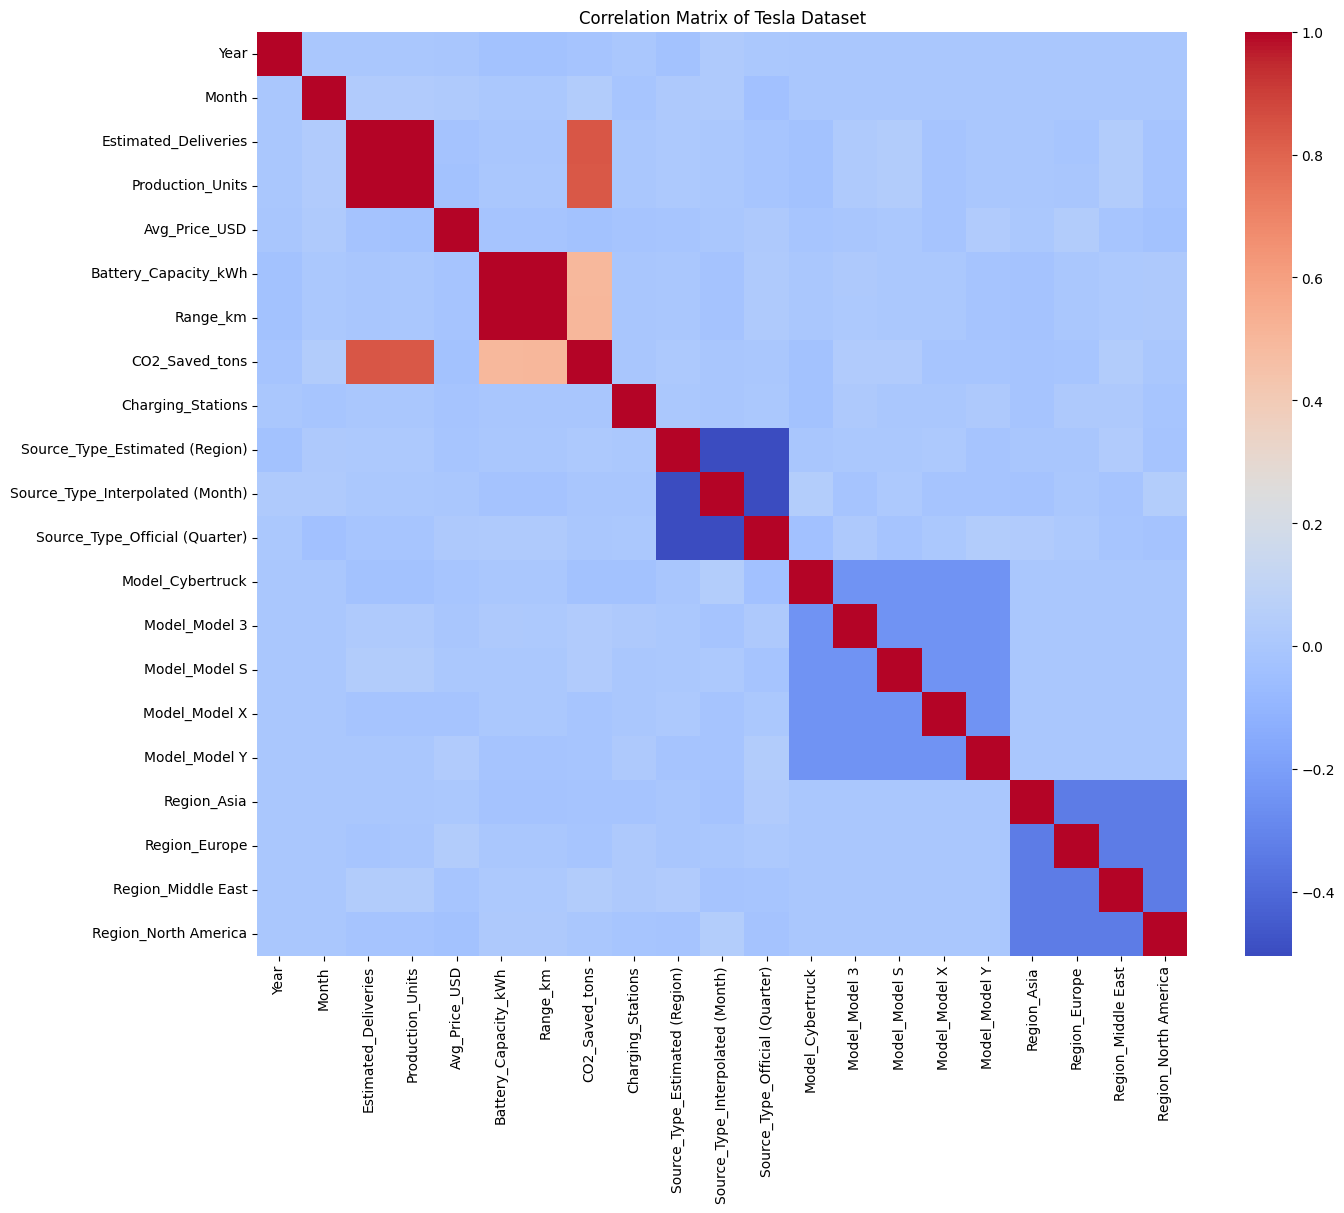

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Tesla Dataset')
plt.show()

### Outlier Analysis

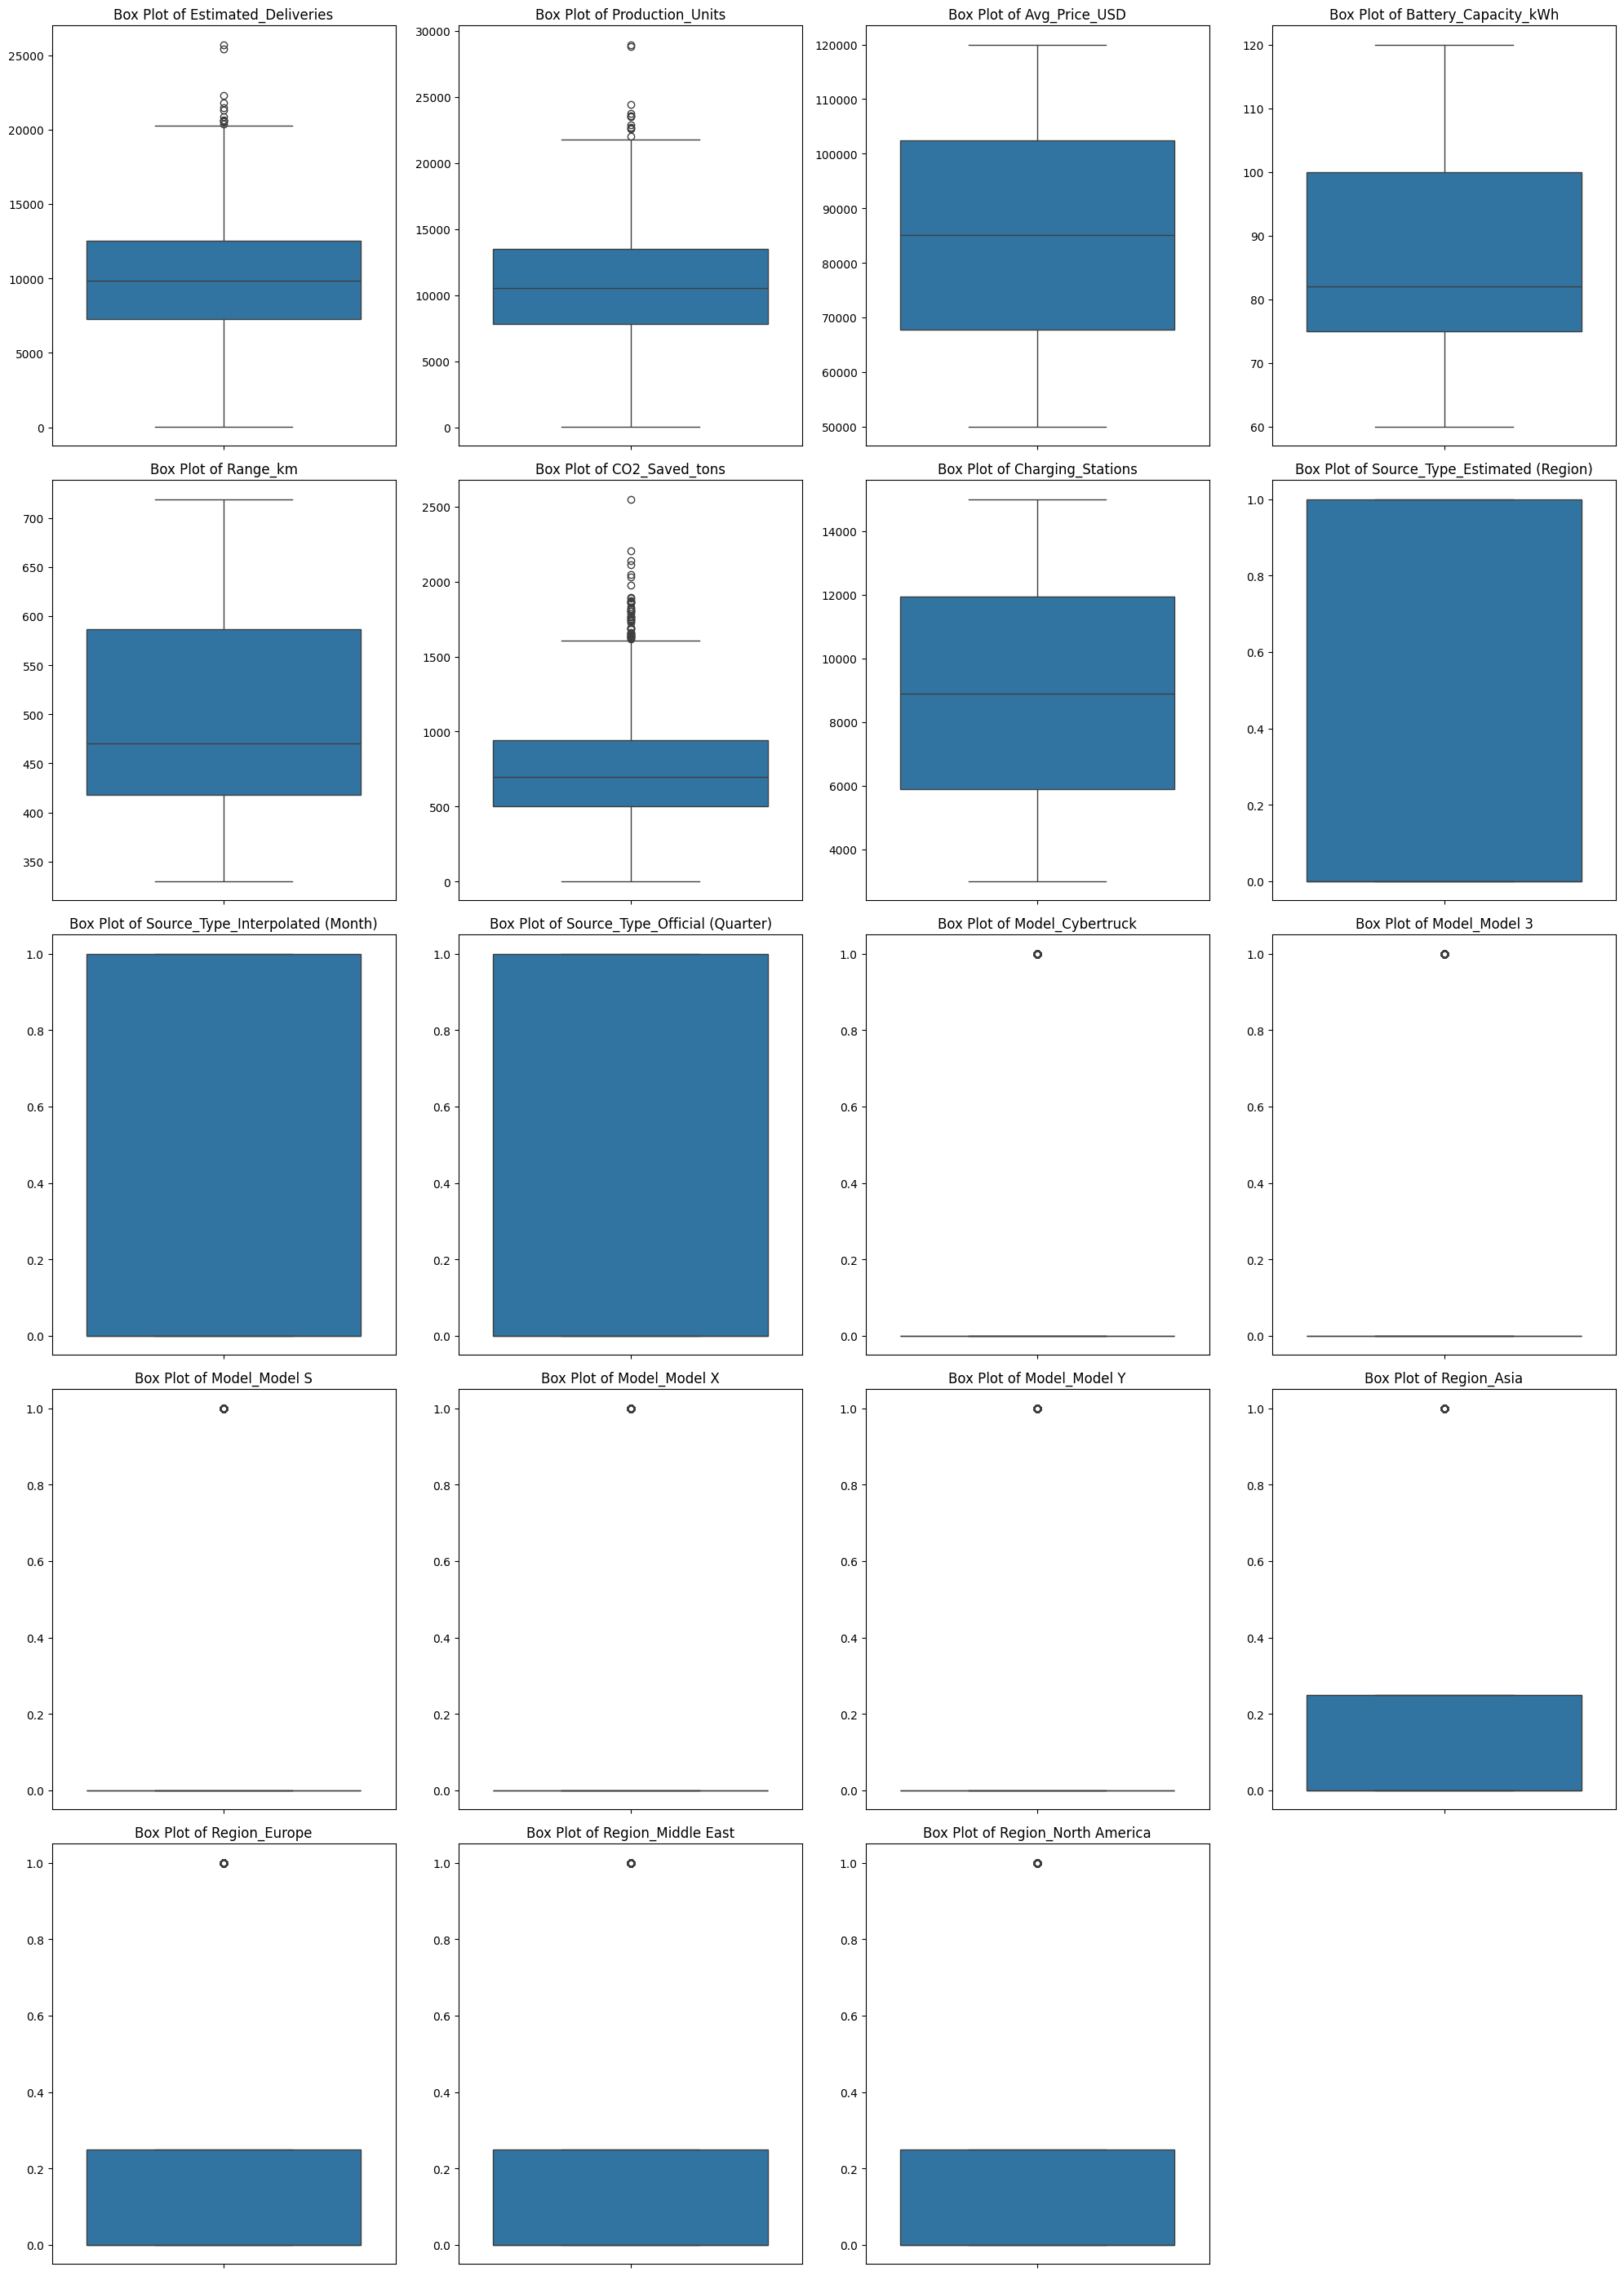

In [ ]:

# Get numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'Year' and 'Month' as they are cyclical and not typically treated for outliers in this context
numeric_cols = [col for col in numeric_cols if col not in ['Year', 'Month']]

# Create box plots for each numerical column to visualize outliers
plt.figure(figsize=(20, 5 * len(numeric_cols) // 4 + 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 4 + 1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-label for cleaner plots
plt.tight_layout()
plt.show()

### Distribution Analysis

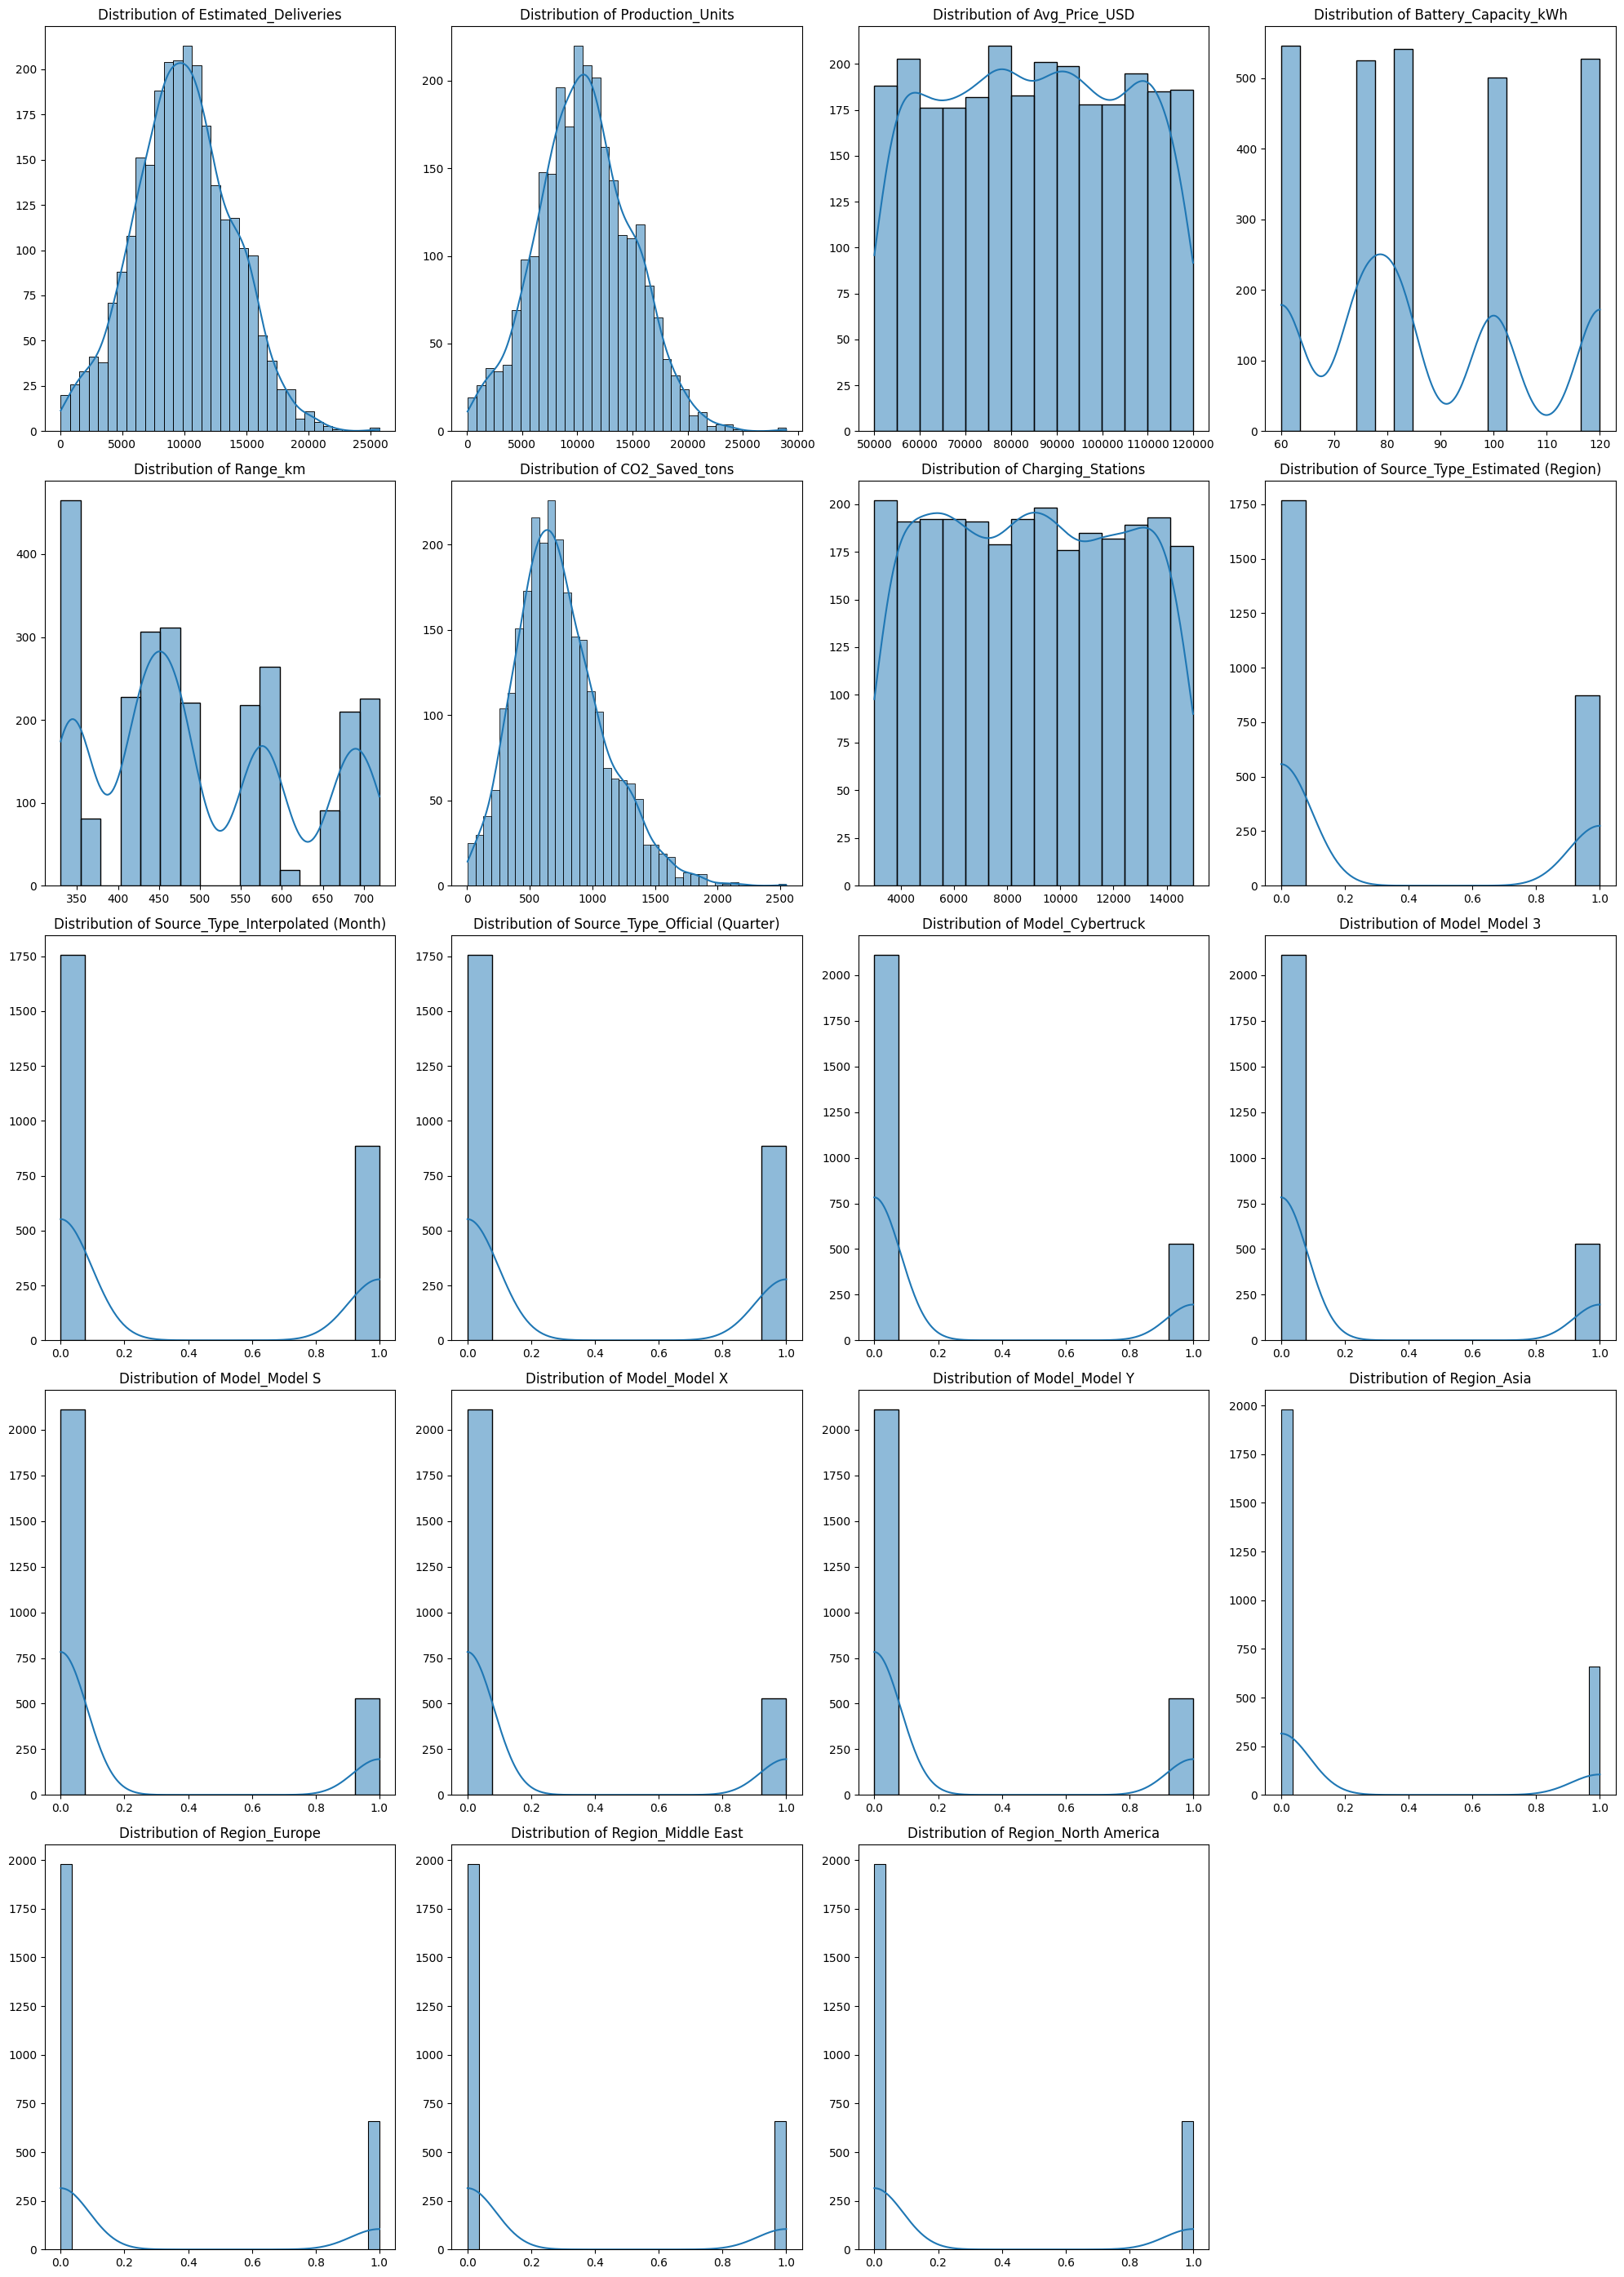

In [ ]:
# Get numerical columns, excluding 'Year' and 'Month'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Year', 'Month']]

# Create distribution plots for each numerical column
plt.figure(figsize=(20, 5 * len(numeric_cols) // 4 + 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 4 + 1, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel('') # Remove x-label for cleaner plots
    plt.ylabel('') # Remove y-label for cleaner plots
plt.tight_layout()
plt.show()

## Train Test Split

In [11]:
X = df.drop('Estimated_Deliveries',axis=1)
y = df['Estimated_Deliveries']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LinearRegression Model

In [13]:
LR = LinearRegression()

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

## Results of LinearRegression

In [14]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Absolute Error (MAE): 311.60
Mean Squared Error (MSE): 148494.42
Root Mean Squared Error (RMSE): 385.35
R-squared (R2): 0.9905


## Correlations with Avg_Price_USD

In [15]:
correlation_with_price = df.corr(numeric_only=True)['Avg_Price_USD'].sort_values(ascending=False)
display(correlation_with_price)

,Avg_Price_USD
Avg_Price_USD,1.000000
Region_Europe,0.034447
Model_Model Y,0.029173
Month,0.024857
Source_Type_Official (Quarter),0.013603
Region_Asia,0.007300
Model_Model S,0.006910
Source_Type_Interpolated (Month),-0.003253
Year,-0.004991
Model_Model 3,-0.009427


## RandomForest Regressor


In [16]:
# Instantiate the RandomForestRegressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)
print("RandomForestRegressor model trained successfully.")

RandomForestRegressor model trained successfully.


In [17]:
y_pred_rf = rf_regressor.predict(X_test)
print("Predictions made using RandomForestRegressor.")

Predictions made using RandomForestRegressor.


## RandomForest Regressor Results

In [19]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R2): {r2_rf:.4f}")

Random Forest Regressor Metrics:
  Mean Absolute Error (MAE): 318.82
  Mean Squared Error (MSE): 169107.32
  Root Mean Squared Error (RMSE): 411.23
  R-squared (R2): 0.9892


In [20]:
print("\n--- Model Performance Comparison ---")
print("Linear Regression Metrics:")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared (R2): {r2:.4f}")

print("\nRandom Forest Regressor Metrics:")
print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"  R-squared (R2): {r2_rf:.4f}")



--- Model Performance Comparison ---
Linear Regression Metrics:
  Mean Absolute Error (MAE): 311.60
  Mean Squared Error (MSE): 148494.42
  Root Mean Squared Error (RMSE): 385.35
  R-squared (R2): 0.9905

Random Forest Regressor Metrics:
  Mean Absolute Error (MAE): 318.82
  Mean Squared Error (MSE): 169107.32
  Root Mean Squared Error (RMSE): 411.23
  R-squared (R2): 0.9892


## Best-Fit Line By both Models

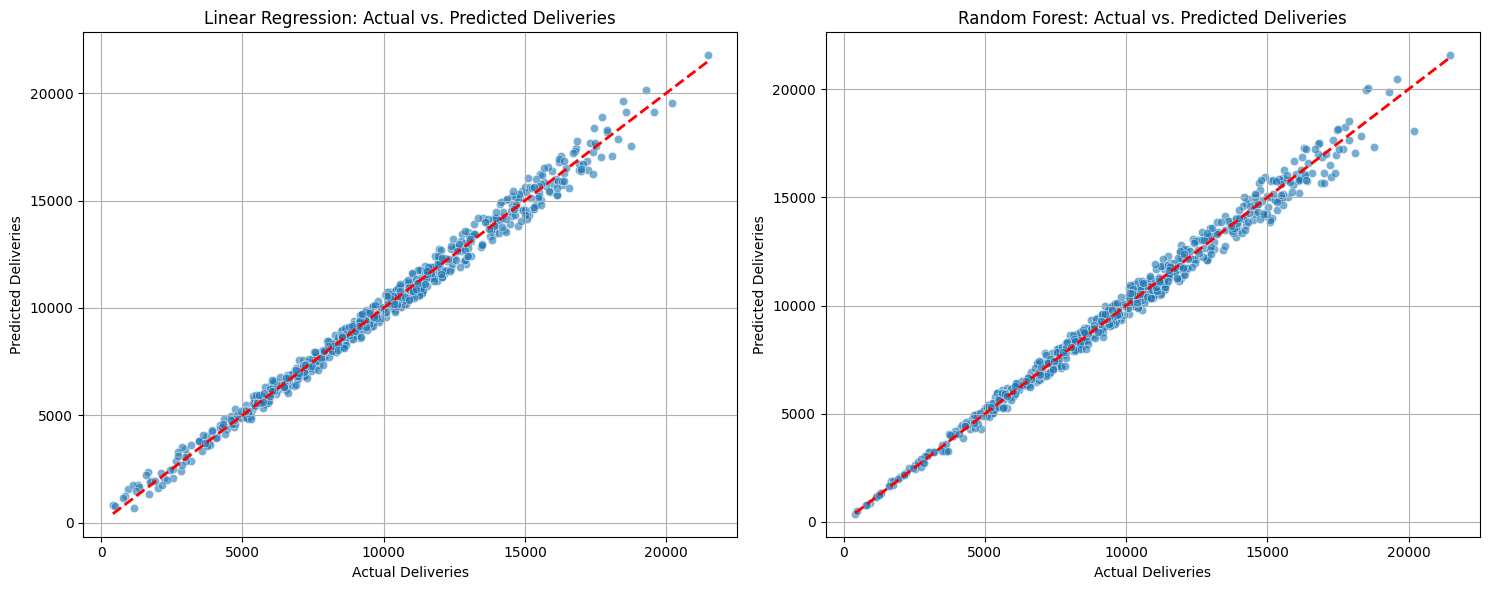

In [21]:
plt.figure(figsize=(15, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect fit line
plt.title('Linear Regression: Actual vs. Predicted Deliveries')
plt.xlabel('Actual Deliveries')
plt.ylabel('Predicted Deliveries')
plt.grid(True)

# Plot for Random Forest Regressor
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect fit line
plt.title('Random Forest: Actual vs. Predicted Deliveries')
plt.xlabel('Actual Deliveries')
plt.ylabel('Predicted Deliveries')
plt.grid(True)

plt.tight_layout()
plt.show()

## To predict new data points

In [22]:
# Define a function to preprocess new data
def preprocess_new_data(new_raw_data, original_df, categorical_cols, scaler, X_train_cols):
    # Create a DataFrame from the new raw data
    new_df = pd.DataFrame([new_raw_data])

    # Apply one-hot encoding to categorical columns
    new_dummy = pd.get_dummies(new_df[categorical_cols]).astype(int)

    # Get all possible dummy columns that were created during training
    # We need to ensure the new_dummy has the same columns as the `dummy` df created during training
    # `dummy` was created from `df[cols]`. Let's get these original dummy columns from `X.columns`
    # by filtering for those that start with 'Source_Type', 'Model', or 'Region'.
    all_dummy_cols = [col for col in X_train_cols if col.startswith(tuple(categorical_cols))]

    # Reindex new_dummy to match all_dummy_cols, filling missing with 0
    new_dummy = new_dummy.reindex(columns=all_dummy_cols, fill_value=0)

    # Drop original categorical columns from new_df
    new_df = new_df.drop(columns=categorical_cols, axis=1)

    # Concatenate numerical and one-hot encoded features
    new_processed_df = pd.concat([new_df, new_dummy], axis=1)

    # Ensure the column order matches X_train
    new_processed_df = new_processed_df[X_train_cols]

    # Scale the numerical features
    new_scaled_data = scaler.transform(new_processed_df)

    return new_scaled_data

# Get the list of columns used for training X (excluding the target 'Estimated_Deliveries')
X_train_cols = X.columns

# Sample new data point - MODIFY THESE VALUES TO TEST DIFFERENT SCENARIOS
new_data_point = {
    'Year': 2024,
    'Month': 6,
    'Production_Units': 18000,
    'Avg_Price_USD': 95000.00,
    'Battery_Capacity_kWh': 100,
    'Range_km': 650,
    'CO2_Saved_tons': 1900.00,
    'Charging_Stations': 13000,
    'Source_Type': 'Interpolated (Month)', # Choose from 'Estimated (Region)', 'Interpolated (Month)', 'Official (Quarter)'
    'Model': 'Model 3', # Choose from 'Cybertruck', 'Model 3', 'Model S', 'Model X', 'Model Y'
    'Region': 'North America' # Choose from 'Asia', 'Europe', 'Middle East', 'North America'
}

# Define the categorical columns used during training
categorical_cols_for_processing = ['Source_Type', 'Model', 'Region']

# Preprocess the new data point
new_data_scaled = preprocess_new_data(new_data_point, df, categorical_cols_for_processing, scaler, X_train_cols)

# Make predictions with Linear Regression
predicted_deliveries_lr = LR.predict(new_data_scaled)

# Make predictions with Random Forest Regressor
predicted_deliveries_rf = rf_regressor.predict(new_data_scaled)

print(f"Predicted Estimated Deliveries (Linear Regression): {predicted_deliveries_lr[0]:.2f}")
print(f"Predicted Estimated Deliveries (Random Forest): {predicted_deliveries_rf[0]:.2f}")

Predicted Estimated Deliveries (Linear Regression): 17519.49
Predicted Estimated Deliveries (Random Forest): 16949.19


## ✅ Conclusion

In this project, we built and evaluated multiple regression models to predict Tesla’s Estimated Deliveries using key indicators such as production volume, pricing, regional trends, and sustainability metrics.
The results show that both models performed exceptionally well, achieving very high R² scores — indicating that the models explained nearly all of the variance in the target variable.

🔹 Linear Regression Performance

MAE: 311.60

MSE: 148,494.42

RMSE: 385.35

R²: 0.9905

Linear Regression delivered the best overall performance, demonstrating very strong linear relationships within the dataset. With an R² of 0.99, the model captures Tesla’s delivery patterns with near-perfect accuracy.

🔹 Random Forest Regressor Performance

MAE: 318.82

MSE: 169,107.32

RMSE: 411.23

R²: 0.9892

The Random Forest model also performed extremely well but slightly underperformed compared to Linear Regression. This suggests that the dataset’s structure is highly linear and that complex tree-based models do not provide additional advantages here.

🎯 Final Insights

Tesla’s delivery numbers can be predicted with very high reliability using simple linear models.

Features in this dataset show strong linear dependencies with Estimated_Deliveries.

More complex models may not always outperform simpler ones, especially when the data naturally aligns with linear relationships.

This notebook provides a strong foundation for future forecasting, business intelligence use cases, and trend analysis in the EV market.

⭐ About Me

I’m Rekhi,  who performs daily machine learning experiments across diverse datasets, tasks, and algorithms.
My goal is to build deep hands-on expertise by consistently practicing data science, training models, evaluating performance, and exploring advanced AI concepts.

I share my work across platforms to help the community and to build a strong research-oriented portfolio.

🔗 My Profiles:

Kaggle: https://www.kaggle.com/seki32

GitHub: https://github.com/Rekhii

If you found this notebook helpful,
➡️ Please UPVOTE on Kaggle — it motivates me to create more high-quality ML notebooks every day.